In [27]:
from scipy import stats
from scipy.special import gamma
from math import factorial, sin, cos, pi, exp
import numpy as np
import matplotlib.pyplot as plt

Uppgift 11)

In [14]:
# Vår data är
samples = [3, 4, 3, 5, 5, 3, 4, 1, 2, 2, 4, 6, 10, 6, 3, 10, 11, 15, 3, 3, 3, 6, 7, 11, 1, 6, 4, 4, 2, 6]

In [15]:
# Sedan X är Po(λ) där λ~gamma(α,β) har vi att E[X] = E[E[X|λ]] = E[λ] = α/β
# Vi har också att Var[X] = E[Var[X|λ]] + Var[E[X|λ]] = α(1+β)/β^2
# Eftersom Var[X] = E[X^2] + E[X]^2 har vi att E[X^2] = (α^2+α(1+β))/β^2
# Det följer att momentmetods punktskattningen är (ungefär) α = 4.59 och β = 0.9
# Sannolikhetsfunktion f(X) är
def est_pdf(x):
    return(gamma(x+1)**(-1)
           *(0.9)**2
           *(gamma(4.59)*(1+0.9)**(4.59+x))**(-1)
           *gamma(4.59+x))

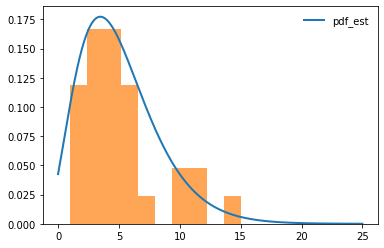

In [16]:
#Nu plottar vi uppskattade sannolikhetsfunktionen tillsammans med datans histogram
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 25, 1000)
ax.plot(x, est_pdf(x), lw=2, label='pdf_est')

ax.hist(samples, density=True, histtype='stepfilled', alpha=0.7)
ax.legend(loc='best', frameon=False)
plt.show()

Uppgift 12)

In [39]:
# Vår data är
samples = [4.708091107118254,
           5.453890570523674, 
           4.564007362205103, 
           6.406495498588102, 
           4.052672548255285, 
           3.576603430333582, 
           2.4927550500004148, 
           4.368051466446142, 
           0.5322646527925211, 
           9.5183994540109, 
           1.9846183065606056, 
           2.39484773715351, 
           1.6137326757638533, 
           0.5733324989332745, 
           1.623613686032522, 
           4.003692696594356, 
           2.1067986378138035, 
           2.0443423647544545, 
           2.032304259365918, 
           1.716278970416475]

In [40]:
# Momentmetodens punktskattningen är (ungefär) λ = 0.852 < ν = 0.946 eller λ = 0.551 < ν = 1.358
# Notisera att vi lösade en kvadratisk ekvation för att hitta ν vilken gav två möjligheter.
# Vi jämför både två med histogrammet och tar den som ser bäst ut. 
# Det följer att de uppskattade täthetsfunktionerna är:
def est_pdf_1(x):
    return(
        (0.852)**2/(2*gamma(2))
        *x*2.718**(-0.852*x)
        +
        (0.946)**2/(2*gamma(4))
        *x**3*2.718**(-0.946*x)
    )

def est_pdf_2(x):
    return(
        (0.551)**2/(2*gamma(2))
        *x*2.718**(-0.551*x)
        +
        (1.358)**2/(2*gamma(4))
        *x**3*2.718**(-1.358*x)
    )

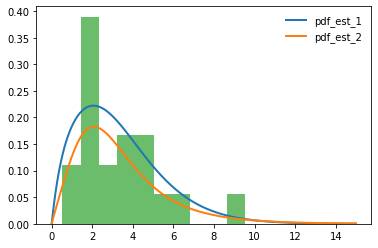

In [41]:
#Nu plottar vi de uppskattade täthetsfunktionerna tillsammans med datas histogram
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 15, 1000)
ax.plot(x, est_pdf_1(x), lw=2, label='pdf_est_1')
ax.plot(x, est_pdf_2(x), lw=2, label='pdf_est_2')

ax.hist(samples, density=True, histtype='stepfilled', alpha=0.7)
ax.legend(loc='best', frameon=False)
plt.show()

Det verkar att pdf_est_1 är lite bättre.